<a href="https://colab.research.google.com/github/mishiruv/EVA5/blob/master/EVA5S6_Mayank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise. 

Here is the list of all the transformations which come pre-built with PyTorch

1.   Compose
2.   ToTensor
3.   ToPILImage
4. Normalize
5. Resize
6. Scale
7. CenterCrop
8. Pad
9. Lambda
10. RandomApply
11. RandomChoice
12. RandomOrder
13. RandomCrop
14. RandomHorizontalFlip
15. RandomVerticalFlip
16. RandomResizedCrop
17. RandomSizedCrop
18. FiveCrop
19. TenCrop
20. LinearTransformation
21. ColorJitter
22. RandomRotation
23. RandomAffine
24. Grayscale
25. RandomGrayscale
26. RandomPerspective
27. RandomErasing

You can read more about them [here](https://pytorch.org/docs/stable/_modules/torchvision/transforms/transforms.html)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-10.0, 10.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Dataset and Creating Train/Test Split

In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Dataloader Arguments & Test/Train Dataloaders


In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


# Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

In [ ]:
# # We'd need to convert it into Numpy! Remember above we have converted it into tensors already
# train_data = train.train_data
# train_data = train.transform(train_data.numpy())

# print('[Train]')
# print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
# print(' - Tensor Shape:', train.train_data.size())
# print(' - min:', torch.min(train_data))
# print(' - max:', torch.max(train_data))
# print(' - mean:', torch.mean(train_data))
# print(' - std:', torch.std(train_data))
# print(' - var:', torch.var(train_data))

# dataiter = iter(train_loader)
# images, labels = dataiter.next()

# print(images.shape)
# print(labels.shape)

# # Let's visualize some of the images

# plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


## MORE

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

In [ ]:
# figure = plt.figure()
# num_of_images = 60
# for index in range(1, num_of_images + 1):
#     plt.subplot(6, 10, index)
#     plt.axis('off')
#     plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# How did we get those mean and std values which we used above?

Let's run a small experiment

In [ ]:
# simple transform
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1305)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


# The model
Let's start with the model we first saw

In [ ]:
dropout_value = 0.00
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Input Convolution Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # input_side = 28, output_size = 28, RF = 3

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 28, RF = 5

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 12, RF = 6

        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 12, RF = 10

        # CONVOLUTION BLOCK 2
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 10, RF = 14
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 8, RF = 18

        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 6, RF = 22

        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 4, RF = 26

        # OUTPUT BLOCK
        self.gap = nn.AvgPool2d(kernel_size=(4,4)) 

        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            # nn.ReLU() NEVER!
        ) # output_size = 1, RF = 26

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.pool1(x)
        x = self.convblock3(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.gap(x)
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

# Model Params
Can't emphasize on how important viewing Model Summary is. 
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
       BatchNorm2d-2           [-1, 10, 28, 28]              20
           Dropout-3           [-1, 10, 28, 28]               0
              ReLU-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 10, 28, 28]             900
       BatchNorm2d-6           [-1, 10, 28, 28]              20
           Dropout-7           [-1, 10, 28, 28]               0
              ReLU-8           [-1, 10, 28, 28]               0
         MaxPool2d-9           [-1, 10, 14, 14]               0
           Conv2d-10           [-1, 10, 12, 12]             900
      BatchNorm2d-11           [-1, 10, 12, 12]              20
          Dropout-12           [-1, 10, 12, 12]               0
             ReLU-13           [-1, 10, 12, 12]               0
           Conv2d-14           [-1

# Ghost Batch normalization

In [ ]:
class BatchNorm(nn.BatchNorm2d):
    def __init__(self, num_features, eps=1e-05, momentum=0.1, weight=True, bias=False):
        super().__init__(num_features, eps=eps, momentum=momentum)
        self.weight.data.fill_(1.0)
        self.bias.data.fill_(0.0)
        self.weight.requires_grad = weight
        self.bias.requires_grad = bias

In [ ]:
class GhostBatchNorm(BatchNorm):
    def __init__(self, num_features, num_splits, **kw):
        super().__init__(num_features, **kw)
        self.num_splits = num_splits
        self.register_buffer('running_mean', torch.zeros(num_features * self.num_splits))
        self.register_buffer('running_var', torch.ones(num_features * self.num_splits))

    def train(self, mode=True):
        if (self.training is True) and (mode is False):  # lazily collate stats when we are going to use them
            self.running_mean = torch.mean(self.running_mean.view(self.num_splits, self.num_features), dim=0).repeat(
                self.num_splits)
            self.running_var = torch.mean(self.running_var.view(self.num_splits, self.num_features), dim=0).repeat(
                self.num_splits)
        return super().train(mode)

    def forward(self, input):
        N, C, H, W = input.shape
        if self.training or not self.track_running_stats:
            return F.batch_norm(
                input.view(-1, C * self.num_splits, H, W), self.running_mean, self.running_var,
                self.weight.repeat(self.num_splits), self.bias.repeat(self.num_splits),
                True, self.momentum, self.eps).view(N, C, H, W)
        else:
            return F.batch_norm(
                input, self.running_mean[:self.num_features], self.running_var[:self.num_features],
                self.weight, self.bias, False, self.momentum, self.eps)

In [ ]:
class NetWithGBN(nn.Module):
    def __init__(self, dropout_value: int):
        super(NetWithGBN, self).__init__()
        # Input Convolution Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            GhostBatchNorm(10, 2),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # input_side = 28, output_size = 28, RF = 3

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            GhostBatchNorm(10,2),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 28, RF = 5

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 12, RF = 6

        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            GhostBatchNorm(10, 2),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 12, RF = 10

        # CONVOLUTION BLOCK 2
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            GhostBatchNorm(10,2), 
            nn.ReLU()
        ) # output_size = 10, RF = 14
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            GhostBatchNorm(10,2), 
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 8, RF = 18

        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            GhostBatchNorm(16, 2), 
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 6, RF = 22

        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            GhostBatchNorm(16, 2),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 4, RF = 26

        # OUTPUT BLOCK
        self.gap = nn.AvgPool2d(kernel_size=(4,4)) 

        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            # nn.ReLU() NEVER!
        ) # output_size = 1, RF = 26

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.pool1(x)
        x = self.convblock3(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.gap(x)
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = NetWithGBN(dropout_value=0.0).to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
    GhostBatchNorm-2           [-1, 10, 28, 28]              20
           Dropout-3           [-1, 10, 28, 28]               0
              ReLU-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 10, 28, 28]             900
    GhostBatchNorm-6           [-1, 10, 28, 28]              20
           Dropout-7           [-1, 10, 28, 28]               0
              ReLU-8           [-1, 10, 28, 28]               0
         MaxPool2d-9           [-1, 10, 14, 14]               0
           Conv2d-10           [-1, 10, 12, 12]             900
   GhostBatchNorm-11           [-1, 10, 12, 12]              20
          Dropout-12           [-1, 10, 12, 12]               0
             ReLU-13           [-1, 10, 12, 12]               0
           Conv2d-14           [-1

# Training and Testing

All right, so we have 6.3M params, and that's too many, we know that. But the purpose of this notebook is to set things right for our future experiments. 

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs. 

Let's write train and test functions

In [ ]:
from tqdm import tqdm

class Trainer():

  def __init__(self):
    self.train_losses = []
    self.test_losses = []
    self.train_acc = []
    self.test_acc = []

  def train(self, model, device, train_loader, optimizer, epoch, lambda_l1):
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0
    for batch_idx, (data, target) in enumerate(pbar):
      # get samples
      data, target = data.to(device), target.to(device)

      # Init
      optimizer.zero_grad()
      # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
      # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

      # Predict
      y_pred = model(data)

      # Calculate loss
      loss = F.nll_loss(y_pred, target)

      # L2 loss

      # L1 loss
      l1 = 0
      # lambda_l1 = 0.05
      for p in model.parameters():
        l1 = l1 + p.abs().sum()
      loss = loss + lambda_l1*l1

      self.train_losses.append(loss)

      # Backpropagation
      loss.backward()
      optimizer.step()

      # Learning rate for onecycle LR # Vamsi - added
      # scheduler.step()

      # Update pbar-tqdm
      
      pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
      correct += pred.eq(target.view_as(pred)).sum().item()
      processed += len(data)

      pbar.set_description(desc= f'Train set: Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
      self.train_acc.append(100*correct/processed)

  def test(self, model, device, test_loader):
      model.eval()
      test_loss = 0
      correct = 0
      with torch.no_grad():
          for data, target in test_loader:
              data, target = data.to(device), target.to(device)
              output = model(data)
              test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
              pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
              correct += pred.eq(target.view_as(pred)).sum().item()

      test_loss /= len(test_loader.dataset)
      self.test_losses.append(test_loss)

      print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
          test_loss, correct, len(test_loader.dataset),
          100. * correct / len(test_loader.dataset)))
      
      self.test_acc.append(100. * correct / len(test_loader.dataset))

  def getValues(self):
    return (self.train_losses, self.test_losses, self.train_acc, self.test_acc)

  def get_misclassified(self, model, test_loader, device):
    misclassified = []
    misclassified_pred = []
    misclassified_target = []
    # put the model to evaluation mode
    model.eval()
    # turn off gradients
    with torch.no_grad():
        for data, target in test_loader:
          # move them to the respective device
          data, target = data.to(device), target.to(device)
          # do inferencing
          output = model(data)
          # get the predicted output
          pred = output.argmax(dim=1, keepdim=True)

          # get the current misclassified in this batch
          list_misclassified = (pred.eq(target.view_as(pred)) == False)
          batch_misclassified = data[list_misclassified]
          batch_mis_pred = pred[list_misclassified]
          batch_mis_target = target.view_as(pred)[list_misclassified]

          misclassified.append(batch_misclassified)
          misclassified_pred.append(batch_mis_pred)
          misclassified_target.append(batch_mis_target)

    # group all the batched together
    misclassified = torch.cat(misclassified)
    misclassified_pred = torch.cat(misclassified_pred)
    misclassified_target = torch.cat(misclassified_target)

    return list(map(lambda x, y, z: (x, y, z), misclassified, misclassified_pred, misclassified_target))

In [ ]:
def plot_metrics(train_losses, train_acc, test_losses, test_acc):
    fig, axs = plt.subplots(2,2,figsize=(15,10))
    axs[0, 0].plot(train_losses)
    axs[0, 0].set_title("Training Loss")
    axs[1, 0].plot(train_acc)
    axs[1, 0].set_title("Training Accuracy")
    axs[0, 1].plot(test_losses)
    axs[0, 1].set_title("Test Loss")
    axs[1, 1].plot(test_acc)
    axs[1, 1].set_title("Test Accuracy")

def plot_misclassification(misclassified):
    print('Total Misclassifications : {}'.format(len(misclassified)))
    num_images = 25
    fig = plt.figure(figsize=(14, 16))
    fig.suptitle('Misclassifications')
    for idx, (image, pred, target) in enumerate(misclassified[:num_images]):
        image, pred, target = image.cpu().numpy(), pred.cpu(), target.cpu()
        ax = fig.add_subplot(5, 5, idx+1)
        ax.axis('off')
        ax.set_title('target {}\npred {}'.format(target.item(), pred.item()), fontsize=12)
        ax.imshow(image.squeeze())
    plt.show()

# Let's Train and test our model

In [ ]:
from torch.optim.lr_scheduler import StepLR,OneCycleLR

In [ ]:
model_gbn =  NetWithGBN(dropout_value=0.01).to(device)
model_bn =  Net().to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-3)

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:351: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
  0%|          | 0/469 [00:00<?, ?it/s]


-----------------------------------------------

-----------------------------------------------
bn_l1
EPOCH: 0 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.09862027317285538 Batch_id=468 Accuracy=85.97: 100%|██████████| 469/469 [00:16<00:00, 28.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1112, Accuracy: 9785/10000 (97.85%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.09307295829057693 Batch_id=468 Accuracy=97.92: 100%|██████████| 469/469 [00:15<00:00, 29.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0708, Accuracy: 9858/10000 (98.58%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.051820214837789536 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:16<00:00, 28.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0624, Accuracy: 9875/10000 (98.75%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.1193796917796135 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:15<00:00, 30.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0576, Accuracy: 9862/10000 (98.62%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.11078294366598129 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:15<00:00, 30.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0700, Accuracy: 9853/10000 (98.53%)

EPOCH: 5 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.11400559544563293 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:15<00:00, 30.46it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0783, Accuracy: 9820/10000 (98.20%)

EPOCH: 6 last LR= [0.001] LR =  [0.0001]


Train set: Loss=0.023029379546642303 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:15<00:00, 30.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0352, Accuracy: 9934/10000 (99.34%)

EPOCH: 7 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.04122372344136238 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:14<00:00, 31.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0352, Accuracy: 9937/10000 (99.37%)

EPOCH: 8 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.07419836521148682 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:14<00:00, 31.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0353, Accuracy: 9939/10000 (99.39%)

EPOCH: 9 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.05689459666609764 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:15<00:00, 31.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0346, Accuracy: 9933/10000 (99.33%)

EPOCH: 10 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.032504528760910034 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:14<00:00, 32.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0338, Accuracy: 9943/10000 (99.43%)

EPOCH: 11 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.07628245651721954 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:14<00:00, 32.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0339, Accuracy: 9936/10000 (99.36%)

EPOCH: 12 last LR= [0.0001] LR =  [1e-05]


Train set: Loss=0.052150432020425797 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:14<00:00, 32.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0332, Accuracy: 9939/10000 (99.39%)

EPOCH: 13 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.03543875738978386 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:14<00:00, 32.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0336, Accuracy: 9940/10000 (99.40%)

EPOCH: 14 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.03024923801422119 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [00:14<00:00, 31.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0329, Accuracy: 9937/10000 (99.37%)

EPOCH: 15 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.049018654972314835 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:14<00:00, 31.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0337, Accuracy: 9940/10000 (99.40%)

EPOCH: 16 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.08829884976148605 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:14<00:00, 31.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0327, Accuracy: 9937/10000 (99.37%)

EPOCH: 17 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.03915736451745033 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:14<00:00, 32.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0333, Accuracy: 9940/10000 (99.40%)

EPOCH: 18 last LR= [1e-05] LR =  [1.0000000000000002e-06]


Train set: Loss=0.027452275156974792 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:14<00:00, 32.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0329, Accuracy: 9940/10000 (99.40%)

EPOCH: 19 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.042505402117967606 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:14<00:00, 32.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0331, Accuracy: 9940/10000 (99.40%)

EPOCH: 20 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.040764253586530685 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:14<00:00, 32.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0324, Accuracy: 9938/10000 (99.38%)

EPOCH: 21 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.020710522308945656 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:14<00:00, 33.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0332, Accuracy: 9942/10000 (99.42%)

EPOCH: 22 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.044341836124658585 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:14<00:00, 32.74it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0327, Accuracy: 9940/10000 (99.40%)

EPOCH: 23 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.06023511290550232 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:14<00:00, 32.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0327, Accuracy: 9936/10000 (99.36%)

EPOCH: 24 last LR= [1.0000000000000002e-06] LR =  [1.0000000000000002e-07]


Train set: Loss=0.06468421965837479 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:14<00:00, 32.98it/s]



Test set: Average loss: 0.0324, Accuracy: 9939/10000 (99.39%)

Total Misclassifications : 61


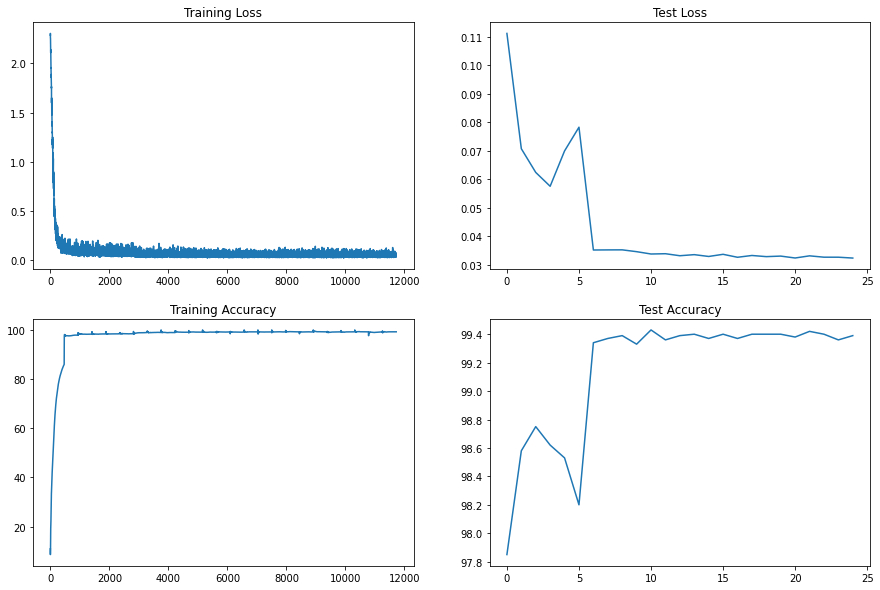

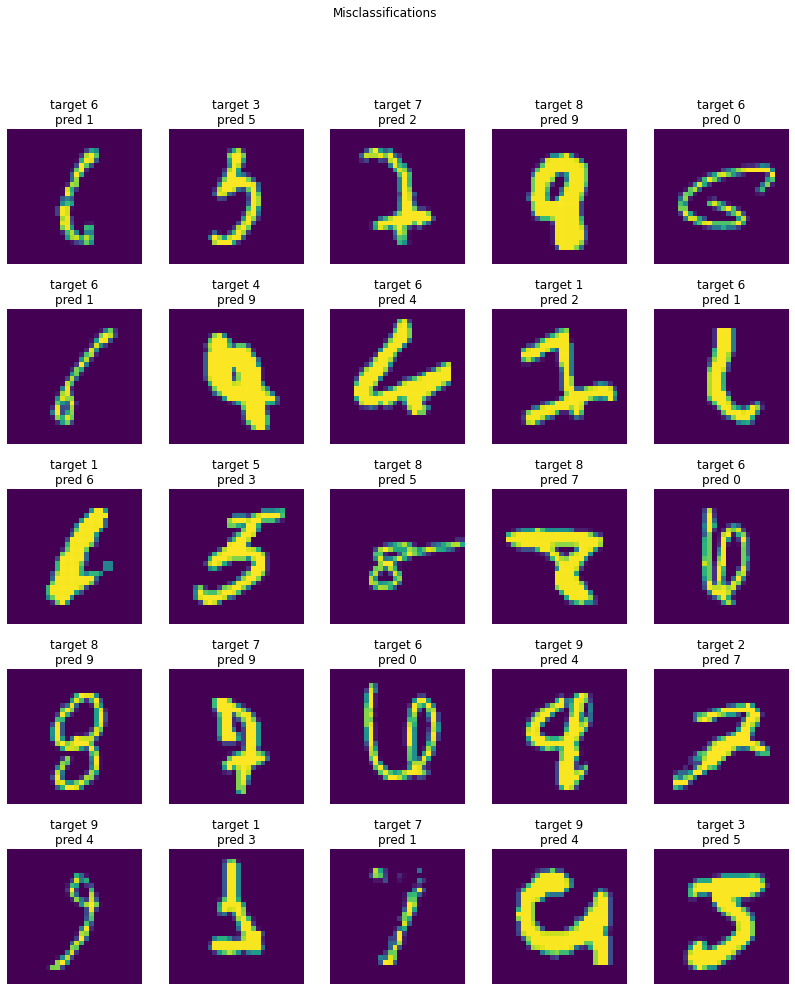

  0%|          | 0/469 [00:00<?, ?it/s]


-----------------------------------------------

-----------------------------------------------
bn_l2
EPOCH: 0 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.33228588104248047 Batch_id=468 Accuracy=88.38: 100%|██████████| 469/469 [00:14<00:00, 32.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0982, Accuracy: 9756/10000 (97.56%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.321948766708374 Batch_id=468 Accuracy=97.88: 100%|██████████| 469/469 [00:13<00:00, 33.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1305, Accuracy: 9610/10000 (96.10%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.20550470054149628 Batch_id=468 Accuracy=97.99: 100%|██████████| 469/469 [00:13<00:00, 33.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0803, Accuracy: 9760/10000 (97.60%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.28481152653694153 Batch_id=468 Accuracy=98.07: 100%|██████████| 469/469 [00:14<00:00, 32.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0591, Accuracy: 9820/10000 (98.20%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.20628993213176727 Batch_id=468 Accuracy=98.08: 100%|██████████| 469/469 [00:14<00:00, 32.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0345, Accuracy: 9892/10000 (98.92%)

EPOCH: 5 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.2194294035434723 Batch_id=468 Accuracy=98.24: 100%|██████████| 469/469 [00:13<00:00, 34.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0482, Accuracy: 9866/10000 (98.66%)

EPOCH: 6 last LR= [0.001] LR =  [0.0001]


Train set: Loss=0.2364882081747055 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:13<00:00, 33.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 9936/10000 (99.36%)

EPOCH: 7 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.1953495591878891 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:14<00:00, 32.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9944/10000 (99.44%)

EPOCH: 8 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.16418419778347015 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:14<00:00, 33.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 9943/10000 (99.43%)

EPOCH: 9 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.1406341940164566 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:14<00:00, 33.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0207, Accuracy: 9950/10000 (99.50%)

EPOCH: 10 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.28601062297821045 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:14<00:00, 33.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0211, Accuracy: 9947/10000 (99.47%)

EPOCH: 11 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.1450623869895935 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:13<00:00, 33.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0212, Accuracy: 9937/10000 (99.37%)

EPOCH: 12 last LR= [0.0001] LR =  [1e-05]


Train set: Loss=0.14616838097572327 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:13<00:00, 34.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 9947/10000 (99.47%)

EPOCH: 13 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.13108697533607483 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:13<00:00, 34.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9948/10000 (99.48%)

EPOCH: 14 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.16555476188659668 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:14<00:00, 33.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9949/10000 (99.49%)

EPOCH: 15 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.16356654465198517 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [00:13<00:00, 34.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9942/10000 (99.42%)

EPOCH: 16 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.14968787133693695 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:13<00:00, 33.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 9942/10000 (99.42%)

EPOCH: 17 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.1953170895576477 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:14<00:00, 31.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9947/10000 (99.47%)

EPOCH: 18 last LR= [1e-05] LR =  [1.0000000000000002e-06]


Train set: Loss=0.15465985238552094 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:15<00:00, 29.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9941/10000 (99.41%)

EPOCH: 19 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.152068629860878 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:14<00:00, 32.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 9940/10000 (99.40%)

EPOCH: 20 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.16928572952747345 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:14<00:00, 32.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9941/10000 (99.41%)

EPOCH: 21 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.14680631458759308 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:14<00:00, 32.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 9940/10000 (99.40%)

EPOCH: 22 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.15154467523097992 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:14<00:00, 32.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9941/10000 (99.41%)

EPOCH: 23 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.2191941738128662 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:14<00:00, 32.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9942/10000 (99.42%)

EPOCH: 24 last LR= [1.0000000000000002e-06] LR =  [1.0000000000000002e-07]


Train set: Loss=0.14711658656597137 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:14<00:00, 32.18it/s]



Test set: Average loss: 0.0190, Accuracy: 9942/10000 (99.42%)

Total Misclassifications : 58


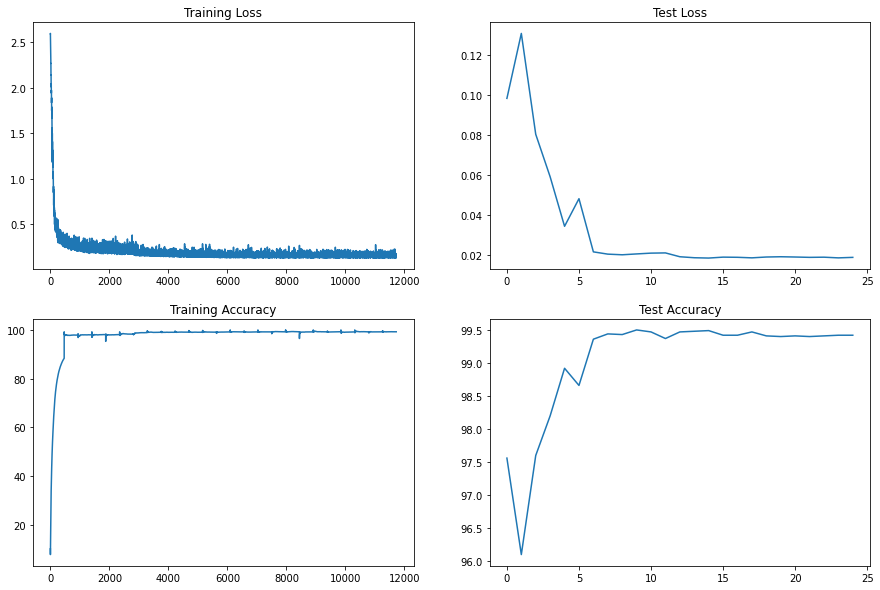

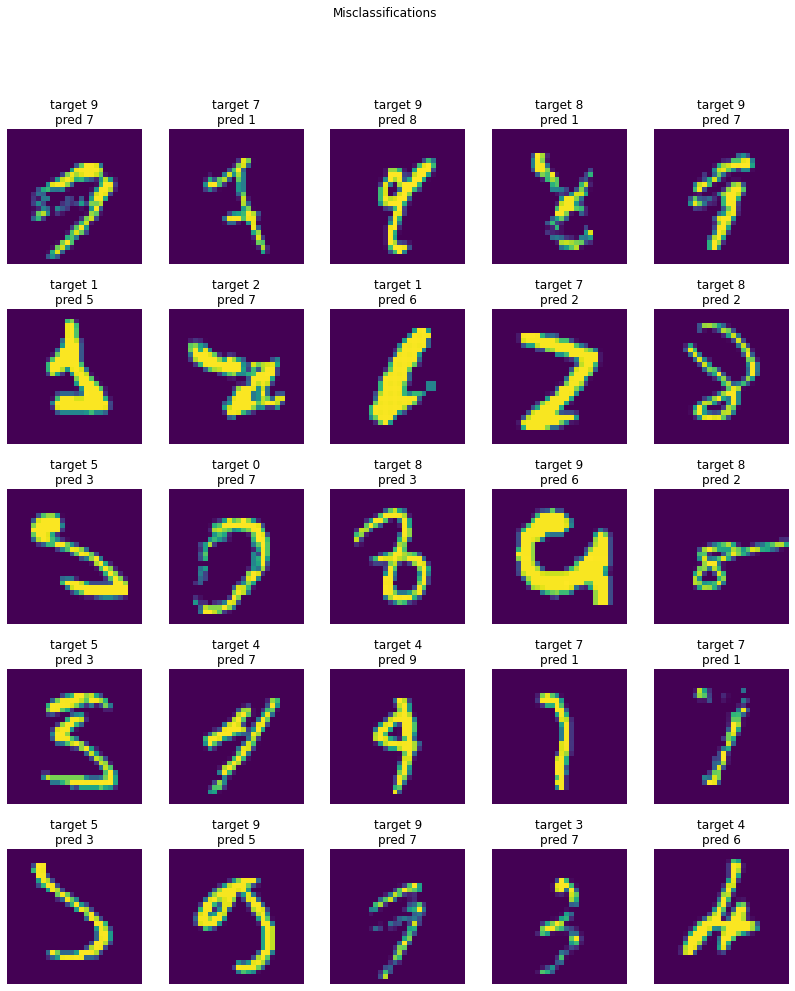

  0%|          | 0/469 [00:00<?, ?it/s]


-----------------------------------------------

-----------------------------------------------
bn_l1_l2
EPOCH: 0 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.3414469361305237 Batch_id=468 Accuracy=88.27: 100%|██████████| 469/469 [00:14<00:00, 31.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1167, Accuracy: 9766/10000 (97.66%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.2672673463821411 Batch_id=468 Accuracy=97.66: 100%|██████████| 469/469 [00:14<00:00, 32.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1047, Accuracy: 9795/10000 (97.95%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.2088494598865509 Batch_id=468 Accuracy=97.86: 100%|██████████| 469/469 [00:14<00:00, 32.59it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1027, Accuracy: 9762/10000 (97.62%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.27651047706604004 Batch_id=468 Accuracy=97.90: 100%|██████████| 469/469 [00:14<00:00, 31.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0751, Accuracy: 9830/10000 (98.30%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.21232403814792633 Batch_id=468 Accuracy=97.92: 100%|██████████| 469/469 [00:14<00:00, 32.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0822, Accuracy: 9823/10000 (98.23%)

EPOCH: 5 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.18303170800209045 Batch_id=468 Accuracy=97.88: 100%|██████████| 469/469 [00:14<00:00, 32.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0890, Accuracy: 9776/10000 (97.76%)

EPOCH: 6 last LR= [0.001] LR =  [0.0001]


Train set: Loss=0.14777952432632446 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:15<00:00, 31.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0394, Accuracy: 9923/10000 (99.23%)

EPOCH: 7 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.12485158443450928 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:14<00:00, 31.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0376, Accuracy: 9929/10000 (99.29%)

EPOCH: 8 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.14761032164096832 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:14<00:00, 31.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0359, Accuracy: 9939/10000 (99.39%)

EPOCH: 9 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.11769437789916992 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:15<00:00, 30.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0364, Accuracy: 9934/10000 (99.34%)

EPOCH: 10 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.14206336438655853 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:15<00:00, 31.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0386, Accuracy: 9932/10000 (99.32%)

EPOCH: 11 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.1419166922569275 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:15<00:00, 31.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0389, Accuracy: 9936/10000 (99.36%)

EPOCH: 12 last LR= [0.0001] LR =  [1e-05]


Train set: Loss=0.11894802749156952 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:14<00:00, 32.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0334, Accuracy: 9944/10000 (99.44%)

EPOCH: 13 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.13426032662391663 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:14<00:00, 32.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0332, Accuracy: 9945/10000 (99.45%)

EPOCH: 14 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.10783088207244873 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:14<00:00, 32.74it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0334, Accuracy: 9943/10000 (99.43%)

EPOCH: 15 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.10021214932203293 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:14<00:00, 31.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0330, Accuracy: 9946/10000 (99.46%)

EPOCH: 16 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.12191188335418701 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:15<00:00, 31.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0332, Accuracy: 9947/10000 (99.47%)

EPOCH: 17 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.1313551664352417 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:14<00:00, 31.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0333, Accuracy: 9944/10000 (99.44%)

EPOCH: 18 last LR= [1e-05] LR =  [1.0000000000000002e-06]


Train set: Loss=0.09918662160634995 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:14<00:00, 31.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0328, Accuracy: 9943/10000 (99.43%)

EPOCH: 19 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.12289370596408844 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:15<00:00, 31.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0332, Accuracy: 9937/10000 (99.37%)

EPOCH: 20 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.12976603209972382 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:14<00:00, 32.49it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0331, Accuracy: 9942/10000 (99.42%)

EPOCH: 21 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.11686728894710541 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:15<00:00, 30.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0328, Accuracy: 9946/10000 (99.46%)

EPOCH: 22 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.14468860626220703 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:14<00:00, 31.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0326, Accuracy: 9946/10000 (99.46%)

EPOCH: 23 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.1872955709695816 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:14<00:00, 32.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0328, Accuracy: 9941/10000 (99.41%)

EPOCH: 24 last LR= [1.0000000000000002e-06] LR =  [1.0000000000000002e-07]


Train set: Loss=0.09896619617938995 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:14<00:00, 31.50it/s]



Test set: Average loss: 0.0328, Accuracy: 9945/10000 (99.45%)

Total Misclassifications : 55


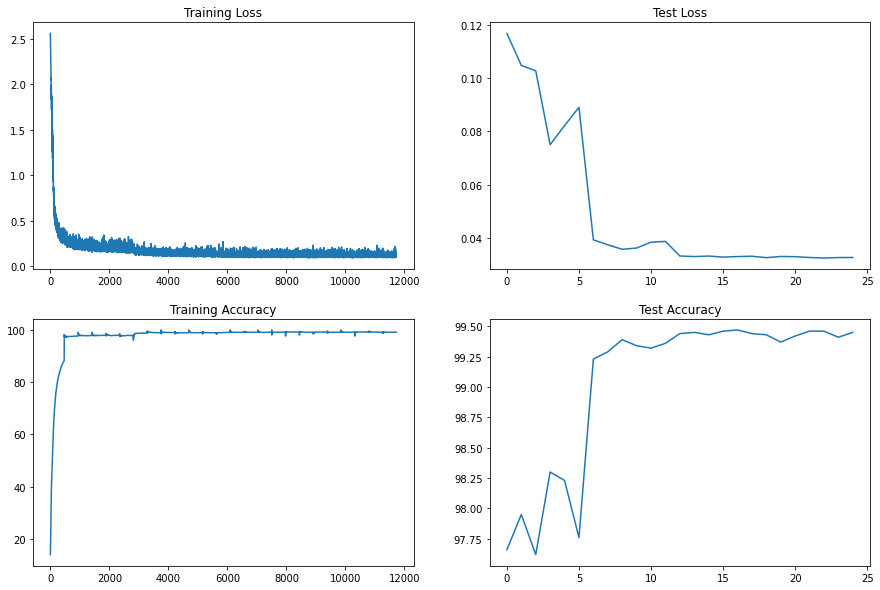

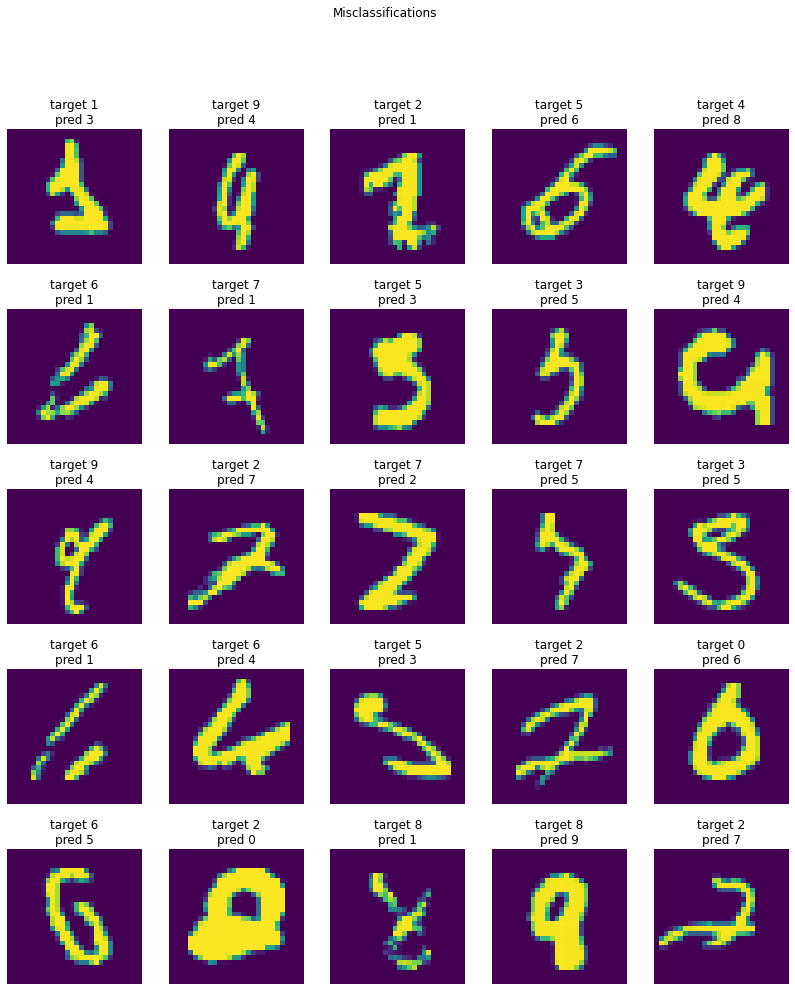

  0%|          | 0/469 [00:00<?, ?it/s]


-----------------------------------------------

-----------------------------------------------
gbn
EPOCH: 0 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.1827196627855301 Batch_id=468 Accuracy=85.97: 100%|██████████| 469/469 [00:14<00:00, 32.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0712, Accuracy: 9827/10000 (98.27%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.2324179857969284 Batch_id=468 Accuracy=97.40: 100%|██████████| 469/469 [00:14<00:00, 32.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0665, Accuracy: 9800/10000 (98.00%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.03835997357964516 Batch_id=468 Accuracy=98.01: 100%|██████████| 469/469 [00:14<00:00, 32.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0332, Accuracy: 9897/10000 (98.97%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.018070083111524582 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:15<00:00, 30.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0302, Accuracy: 9923/10000 (99.23%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.1077553927898407 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:14<00:00, 31.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0332, Accuracy: 9897/10000 (98.97%)

EPOCH: 5 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.018280522897839546 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:14<00:00, 32.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 9937/10000 (99.37%)

EPOCH: 6 last LR= [0.001] LR =  [0.0001]


Train set: Loss=0.028978899121284485 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:14<00:00, 32.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9950/10000 (99.50%)

EPOCH: 7 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.044772256165742874 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:14<00:00, 32.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9950/10000 (99.50%)

EPOCH: 8 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.0882658064365387 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:14<00:00, 31.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 9948/10000 (99.48%)

EPOCH: 9 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.029537290334701538 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:14<00:00, 31.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 9949/10000 (99.49%)

EPOCH: 10 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.07196266204118729 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:14<00:00, 32.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9950/10000 (99.50%)

EPOCH: 11 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.009400340728461742 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:14<00:00, 32.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9950/10000 (99.50%)

EPOCH: 12 last LR= [0.0001] LR =  [1e-05]


Train set: Loss=0.07275912165641785 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:14<00:00, 32.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 9951/10000 (99.51%)

EPOCH: 13 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.0665094330906868 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:14<00:00, 32.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9952/10000 (99.52%)

EPOCH: 14 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.021241074427962303 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:14<00:00, 31.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9951/10000 (99.51%)

EPOCH: 15 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.06852357089519501 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:14<00:00, 31.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9949/10000 (99.49%)

EPOCH: 16 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.031193822622299194 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:14<00:00, 32.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9949/10000 (99.49%)

EPOCH: 17 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.029721662402153015 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:14<00:00, 31.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9950/10000 (99.50%)

EPOCH: 18 last LR= [1e-05] LR =  [1.0000000000000002e-06]


Train set: Loss=0.009255323559045792 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:14<00:00, 31.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9947/10000 (99.47%)

EPOCH: 19 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.01160155888646841 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:14<00:00, 32.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9952/10000 (99.52%)

EPOCH: 20 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.0262951347976923 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:14<00:00, 32.53it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9950/10000 (99.50%)

EPOCH: 21 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.022764593362808228 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:14<00:00, 32.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9950/10000 (99.50%)

EPOCH: 22 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.016271905973553658 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:15<00:00, 31.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 9951/10000 (99.51%)

EPOCH: 23 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.03820229321718216 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:14<00:00, 31.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 9949/10000 (99.49%)

EPOCH: 24 last LR= [1.0000000000000002e-06] LR =  [1.0000000000000002e-07]


Train set: Loss=0.07561982423067093 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:14<00:00, 31.63it/s]



Test set: Average loss: 0.0173, Accuracy: 9950/10000 (99.50%)

Total Misclassifications : 50


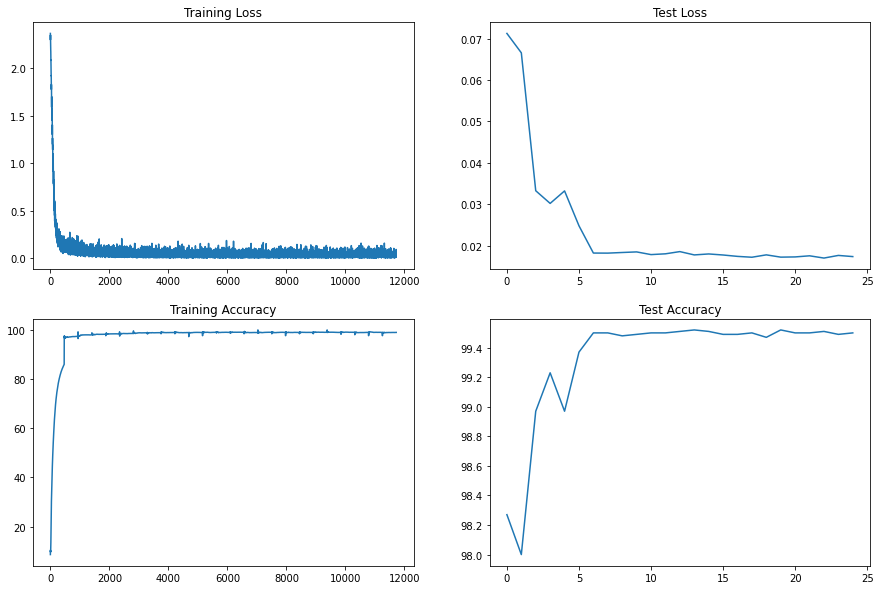

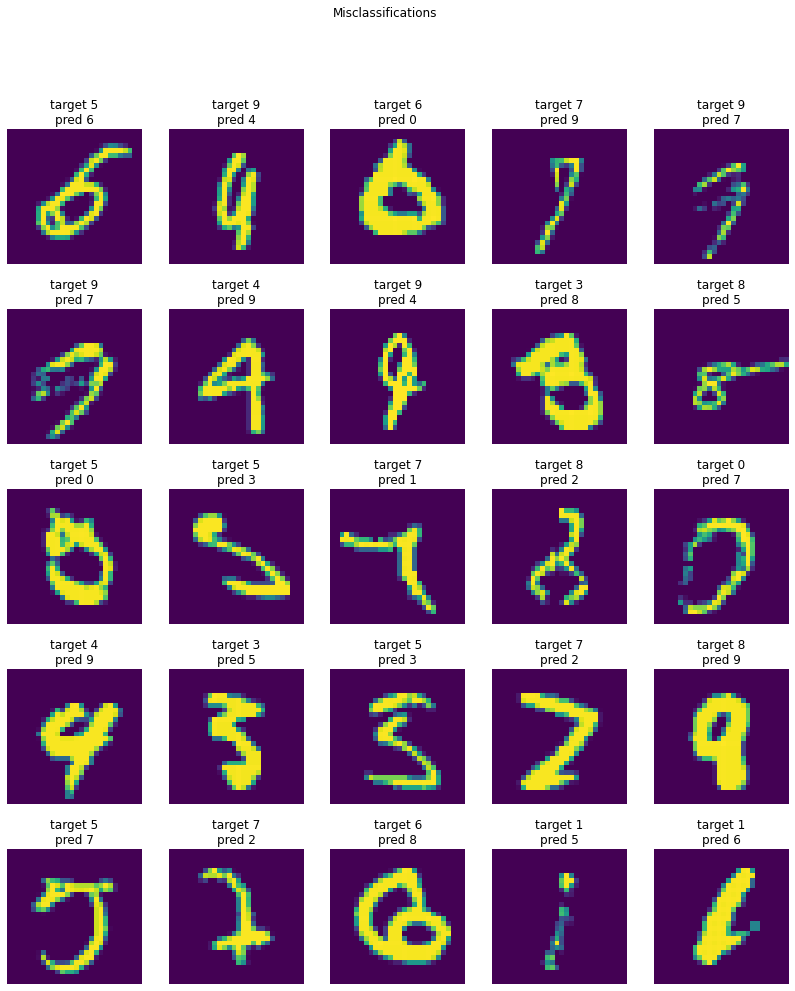

  0%|          | 0/469 [00:00<?, ?it/s]


-----------------------------------------------

-----------------------------------------------
gbn_l1_l2
EPOCH: 0 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.335201621055603 Batch_id=468 Accuracy=84.33: 100%|██████████| 469/469 [00:14<00:00, 31.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1376, Accuracy: 9758/10000 (97.58%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.4235089421272278 Batch_id=468 Accuracy=97.20: 100%|██████████| 469/469 [00:14<00:00, 31.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1142, Accuracy: 9740/10000 (97.40%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.21249732375144958 Batch_id=468 Accuracy=97.52: 100%|██████████| 469/469 [00:14<00:00, 32.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0891, Accuracy: 9808/10000 (98.08%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.19088584184646606 Batch_id=468 Accuracy=97.58: 100%|██████████| 469/469 [00:14<00:00, 31.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0943, Accuracy: 9778/10000 (97.78%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.1955946683883667 Batch_id=468 Accuracy=97.62: 100%|██████████| 469/469 [00:14<00:00, 32.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0819, Accuracy: 9830/10000 (98.30%)

EPOCH: 5 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.22900402545928955 Batch_id=84 Accuracy=97.78:  17%|█▋        | 82/469 [00:02<00:10, 36.20it/s]

In [ ]:
trail_iterations = [('bn_l1', model_bn, 5e-3, 0), ('bn_l2', model_bn, 0, 5e-4), ('bn_l1_l2', model_bn,5e-3, 5e-4) , 
                    ('gbn', model_gbn,0,0), ('gbn_l1_l2', model_gbn, 5e-3, 5e-4)]

metric_acc_values = []
metric_loss_values = []

for i, trail in enumerate(trail_iterations):
  print("\n-----------------------------------------------")
  print("\n-----------------------------------------------")
  print(trail[0])
  EPOCHS = 25
  if i in (0,1,2):
    myModel = Net().to(device)
  else:
    myModel = NetWithGBN(0.01).to(device)
  optimizer = optim.SGD(myModel.parameters(), lr=0.01, momentum=0.9, weight_decay=trail[2])
  scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

  trainer = Trainer()

  for epoch in range(EPOCHS):
      print("EPOCH:", epoch, "last LR=",scheduler.get_last_lr(), "LR = ", scheduler.get_lr())
      # def train(model, device, train_loader, optimizer, epoch, lambda_l1):
      trainer.train(myModel, device, train_loader, optimizer, epoch, trail[3])
      trainer.test(myModel, device, test_loader)
      scheduler.step() # for StepLR

  (train_losses, test_losses, train_acc, test_acc) = trainer.getValues()

  plot_metrics(train_losses, train_acc, test_losses, test_acc)
  metric_acc_values.extend([test_acc])
  metric_loss_values.extend([test_losses])
  # get_misclassified(self, model, test_loader, device):
  misclassifications = trainer.get_misclassified(myModel, test_loader, device)
  plot_misclassification(misclassified=misclassifications)

In [ ]:
def plot_acc_loss(acc_loss, msg):
    plt.figure(figsize=(12,12))
    plt.plot(acc_loss[0],color='Red',   label='BN_L1')
    plt.plot(acc_loss[1],color='Blue',     label='BN_L2')
    plt.plot(acc_loss[2],color='Green',    label='BN_L1_L2')
    plt.plot(acc_loss[3],color='Yellow',  label='GBN')
    plt.plot(acc_loss[4],color='Black', label='GBN_L1_L2')
        
    plt.xlabel(' Epochs ')

    if msg == 'Loss':
        plt.ylabel(' Loss ')
        plt.title('Total losses vs Epochs')
    elif msg == 'Acc':
        plt.ylabel(' Accuracy ')
        plt.title('Total accuracy vs Epochs')

    plt.legend(loc = 'upper left' , bbox_to_anchor = (1,1))
    plt.legend()
    
    plt.show()

NameError: ignored

In [ ]:
plot_acc_loss(metric_acc_values, "Acc")

In [ ]:
plot_acc_loss(metric_loss_values, "Loss")

In [ ]:
metric_loss_values

In [ ]:
metric_acc_values

# **The Model**

## Target

*   Less than 10000 parameters
*   Less than 15 epochs


## Results

*   Number of Parameters = 9534
*   Best Train Accuracy = 99.11
*   Best Test Accuracy = 99.45





# Analysis
The network is now conistently predicting accuracy of 99.4+ and is a good network. However, since its a bit underfitting, with some additional capacity, it can be further pushed.
